# Lesson 1.5: Color Spaces
## Biomedical Image Processing - Basic Concepts

### Topics:
- RGB color model
- HSV/HSL color spaces
- Grayscale conversion methods
- Color space applications in medical imaging

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. The RGB Color Model

Every color on your screen is made by mixing three lights:
- **R**ed
- **G**reen
- **B**lue

This is called **additive** color mixing.

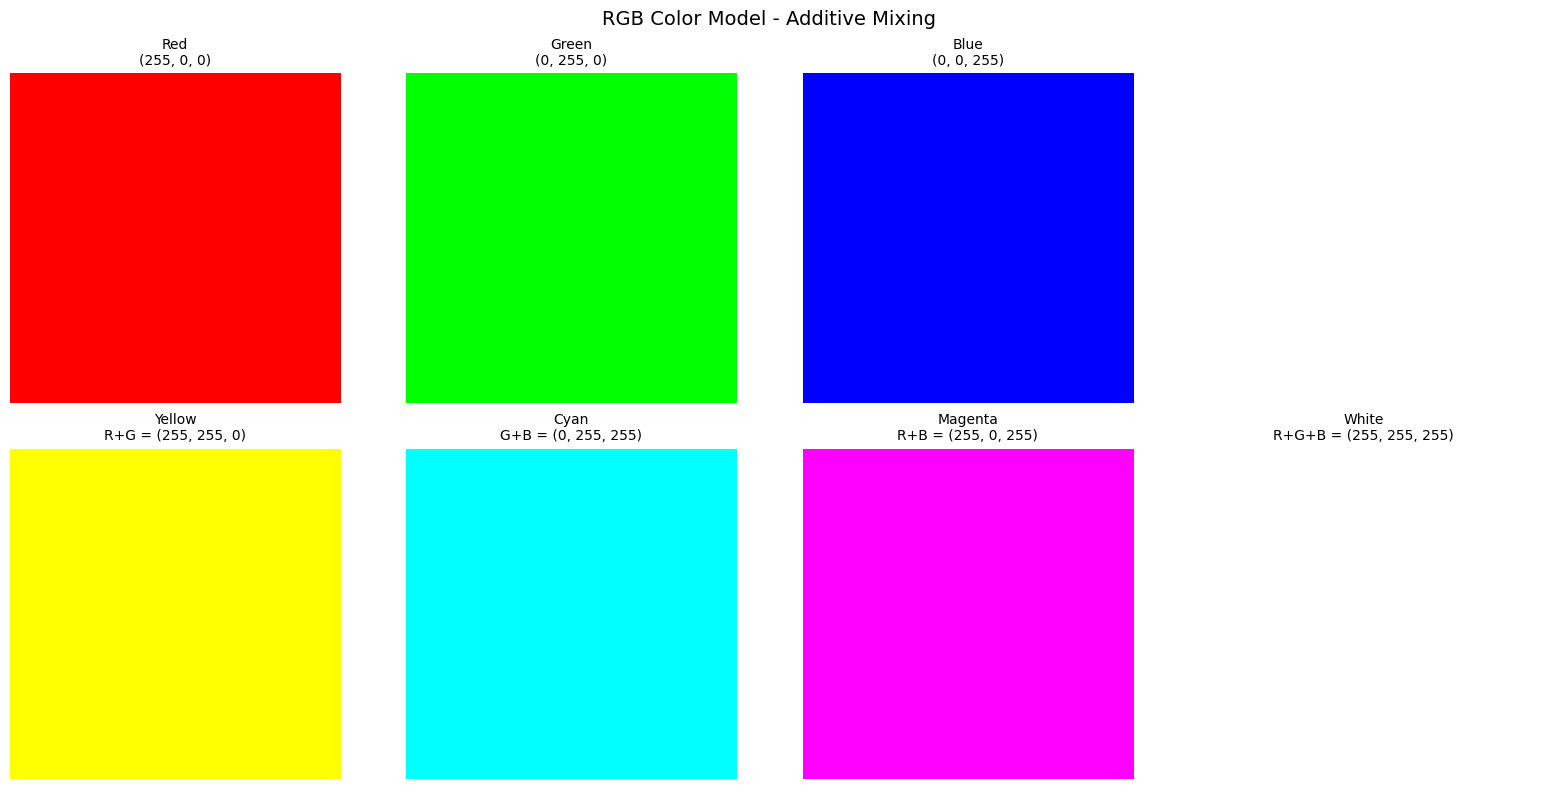

Notice: Mixing ALL three primaries gives WHITE (not brown/black like paint!)


In [10]:
# Create primary and secondary colors
def create_color_square(rgb, size=50):
    return np.full((size, size, 3), rgb, dtype=np.uint8)

# Primary colors
red = create_color_square([255, 0, 0])
green = create_color_square([0, 255, 0])
blue = create_color_square([0, 0, 255])

# Secondary colors (mixing two primaries)
yellow = create_color_square([255, 255, 0])   # Red + Green
cyan = create_color_square([0, 255, 255])     # Green + Blue
magenta = create_color_square([255, 0, 255])  # Red + Blue

# All three = White
white = create_color_square([255, 255, 255])

fig, axes = plt.subplots(2, 4, figsize=(16, 8))

colors = [
    (red, 'Red\n(255, 0, 0)', [255, 0, 0]),
    (green, 'Green\n(0, 255, 0)', [0, 255, 0]),
    (blue, 'Blue\n(0, 0, 255)', [0, 0, 255]),
    (None, '', None),
    (yellow, 'Yellow\nR+G = (255, 255, 0)', [255, 255, 0]),
    (cyan, 'Cyan\nG+B = (0, 255, 255)', [0, 255, 255]),
    (magenta, 'Magenta\nR+B = (255, 0, 255)', [255, 0, 255]),
    (white, 'White\nR+G+B = (255, 255, 255)', [255, 255, 255]),
]

for ax, (img, title, _) in zip(axes.flat, colors):
    if img is not None:
        ax.imshow(img)
        ax.set_title(title, fontsize=10)
    ax.axis('off')

plt.suptitle('RGB Color Model - Additive Mixing', fontsize=14)
plt.tight_layout()
plt.show()

print("Notice: Mixing ALL three primaries gives WHITE (not brown/black like paint!)")

## 2. The RGB Color Cube

We can visualize all possible RGB colors as a 3D cube.

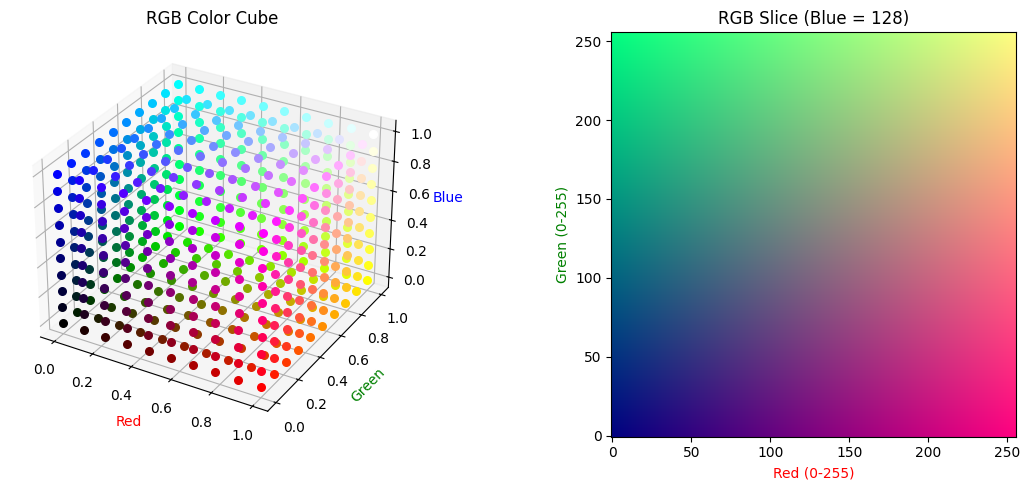

In [11]:
fig = plt.figure(figsize=(12, 5))

# 3D RGB cube visualization
ax1 = fig.add_subplot(121, projection='3d')

# Create points on the cube surface
n = 10
for r in np.linspace(0, 1, n):
    for g in np.linspace(0, 1, n):
        for b in np.linspace(0, 1, n):
            # Only plot surface points
            if r in [0, 1] or g in [0, 1] or b in [0, 1]:
                ax1.scatter(r, g, b, c=[[r, g, b]], s=30)

ax1.set_xlabel('Red', fontsize=10, color='red')
ax1.set_ylabel('Green', fontsize=10, color='green')
ax1.set_zlabel('Blue', fontsize=10, color='blue')
ax1.set_title('RGB Color Cube')

# Key corners
corners = [
    ([0,0,0], 'Black'),
    ([1,1,1], 'White'),
    ([1,0,0], 'Red'),
    ([0,1,0], 'Green'),
    ([0,0,1], 'Blue'),
]

# 2D slice through the cube
ax2 = fig.add_subplot(122)
# Create RGB gradient
x = np.linspace(0, 255, 256).astype(np.uint8)
y = np.linspace(0, 255, 256).astype(np.uint8)
X, Y = np.meshgrid(x, y)
B = 128  # Fixed blue value

rgb_slice = np.stack([X, Y, np.full_like(X, B)], axis=2)
ax2.imshow(rgb_slice, origin='lower')
ax2.set_xlabel('Red (0-255)', color='red')
ax2.set_ylabel('Green (0-255)', color='green')
ax2.set_title(f'RGB Slice (Blue = {B})')

plt.tight_layout()
plt.show()

## 3. Grayscale Conversion Methods

There are multiple ways to convert color to grayscale. They're NOT all the same!

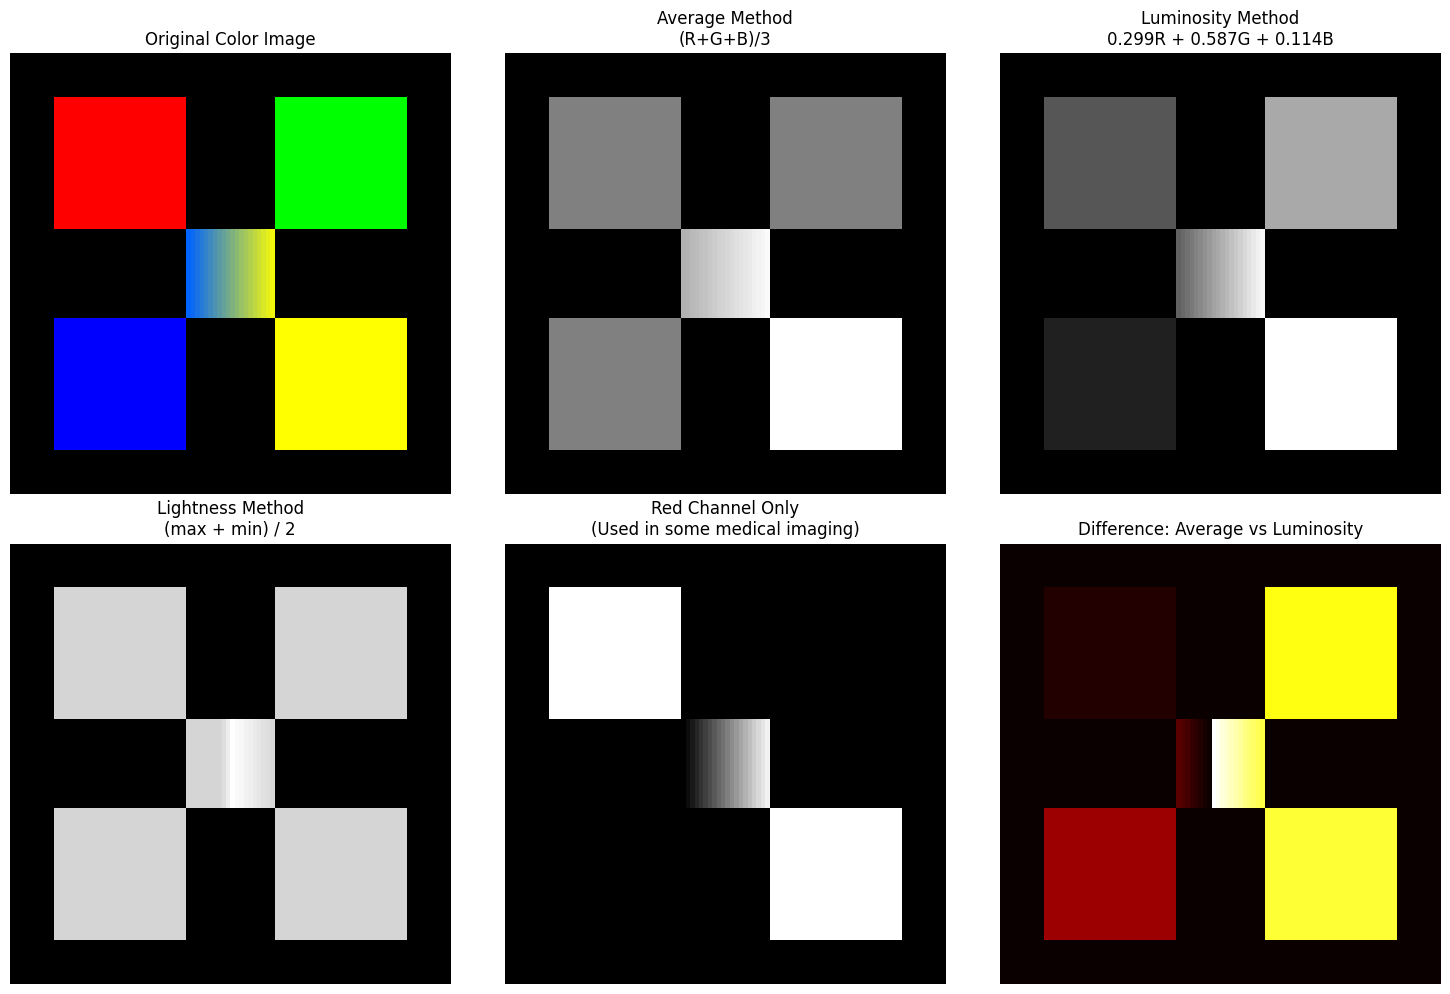

Notice: Green appears brighter in Luminosity method (our eyes are most sensitive to green!)
Blue appears darker (our eyes are least sensitive to blue!)


In [12]:
# Create a colorful test image
size = 100
test_color = np.zeros((size, size, 3), dtype=np.uint8)

# Red square
test_color[10:40, 10:40] = [255, 0, 0]
# Green square
test_color[10:40, 60:90] = [0, 255, 0]
# Blue square
test_color[60:90, 10:40] = [0, 0, 255]
# Yellow square
test_color[60:90, 60:90] = [255, 255, 0]
# Gradient in the middle
for i in range(20):
    test_color[40:60, 40+i:41+i] = [int(255*i/20), int(100+155*i/20), int(255*(20-i)/20)]

# Different grayscale methods
def gray_average(img):
    """Simple average of R, G, B."""
    return np.mean(img, axis=2).astype(np.uint8)

def gray_luminosity(img):
    """Weighted average matching human perception (ITU-R BT.601)."""
    return (0.299 * img[:,:,0] + 0.587 * img[:,:,1] + 0.114 * img[:,:,2]).astype(np.uint8)

def gray_lightness(img):
    """Average of max and min channel values."""
    return ((np.max(img, axis=2).astype(np.float32) + np.min(img, axis=2).astype(np.float32)) / 2).astype(np.uint8)

def gray_red_channel(img):
    """Just the red channel."""
    return img[:,:,0]

# Apply methods
gray_avg = gray_average(test_color)
gray_lum = gray_luminosity(test_color)
gray_light = gray_lightness(test_color)
gray_red = gray_red_channel(test_color)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(test_color)
axes[0, 0].set_title('Original Color Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(gray_avg, cmap='gray')
axes[0, 1].set_title('Average Method\n(R+G+B)/3')
axes[0, 1].axis('off')

axes[0, 2].imshow(gray_lum, cmap='gray')
axes[0, 2].set_title('Luminosity Method\n0.299R + 0.587G + 0.114B')
axes[0, 2].axis('off')

axes[1, 0].imshow(gray_light, cmap='gray')
axes[1, 0].set_title('Lightness Method\n(max + min) / 2')
axes[1, 0].axis('off')

axes[1, 1].imshow(gray_red, cmap='gray')
axes[1, 1].set_title('Red Channel Only\n(Used in some medical imaging)')
axes[1, 1].axis('off')

# Show the differences
diff = np.abs(gray_avg - gray_lum)
axes[1, 2].imshow(diff, cmap='hot')
axes[1, 2].set_title('Difference: Average vs Luminosity')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

print("Notice: Green appears brighter in Luminosity method (our eyes are most sensitive to green!)")
print("Blue appears darker (our eyes are least sensitive to blue!)")

## 4. The HSV Color Space

HSV (Hue, Saturation, Value) is more intuitive for humans:
- **Hue**: The "color" (0-360 degrees, like a color wheel)
- **Saturation**: How "pure" the color is (0-100%)
- **Value**: How bright (0-100%)

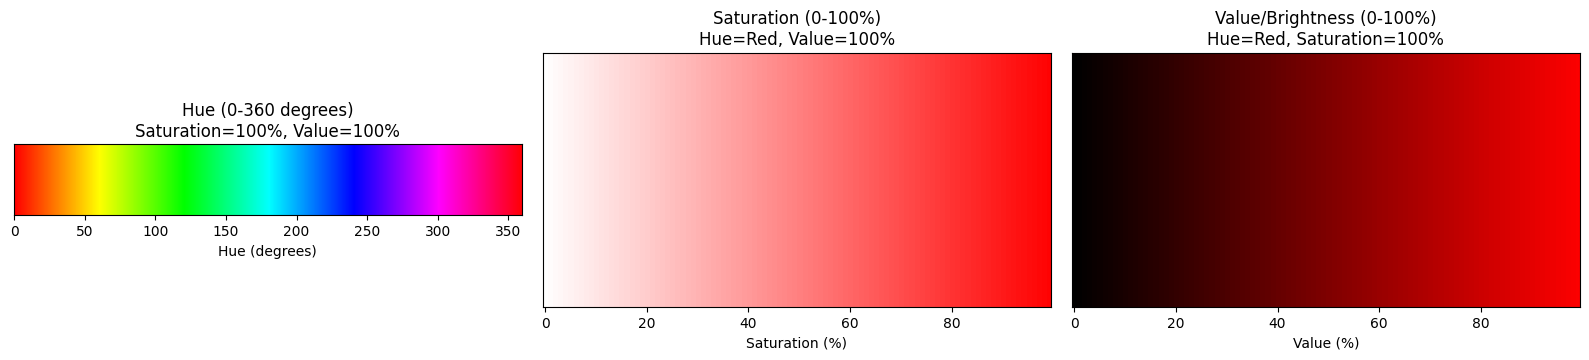


Color Conversions:
Pure Red     RGB(255,  0,  0) -> HSV(  0.0°, 100.0%, 100.0%)
Pure Green   RGB(  0,255,  0) -> HSV(120.0°, 100.0%, 100.0%)
Pure Blue    RGB(  0,  0,255) -> HSV(240.0°, 100.0%, 100.0%)
Yellow       RGB(255,255,  0) -> HSV( 60.0°, 100.0%, 100.0%)
White        RGB(255,255,255) -> HSV(  0.0°,   0.0%, 100.0%)
Gray         RGB(128,128,128) -> HSV(  0.0°,   0.0%,  50.2%)


In [13]:
def rgb_to_hsv(r, g, b):
    """Convert RGB (0-255) to HSV (H:0-360, S:0-100, V:0-100)."""
    r, g, b = r/255.0, g/255.0, b/255.0
    mx = max(r, g, b)
    mn = min(r, g, b)
    diff = mx - mn
    
    # Value
    v = mx * 100
    
    # Saturation
    s = 0 if mx == 0 else (diff / mx) * 100
    
    # Hue
    if diff == 0:
        h = 0
    elif mx == r:
        h = 60 * (((g - b) / diff) % 6)
    elif mx == g:
        h = 60 * (((b - r) / diff) + 2)
    else:
        h = 60 * (((r - g) / diff) + 4)
    
    return h, s, v

def hsv_to_rgb(h, s, v):
    """Convert HSV to RGB."""
    s, v = s/100, v/100
    c = v * s
    x = c * (1 - abs((h/60) % 2 - 1))
    m = v - c
    
    if h < 60:
        r, g, b = c, x, 0
    elif h < 120:
        r, g, b = x, c, 0
    elif h < 180:
        r, g, b = 0, c, x
    elif h < 240:
        r, g, b = 0, x, c
    elif h < 300:
        r, g, b = x, 0, c
    else:
        r, g, b = c, 0, x
    
    return int((r+m)*255), int((g+m)*255), int((b+m)*255)

# Create HSV visualization
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Hue wheel
hue_bar = np.zeros((50, 360, 3), dtype=np.uint8)
for h in range(360):
    r, g, b = hsv_to_rgb(h, 100, 100)
    hue_bar[:, h] = [r, g, b]

axes[0].imshow(hue_bar)
axes[0].set_title('Hue (0-360 degrees)\nSaturation=100%, Value=100%')
axes[0].set_xlabel('Hue (degrees)')
axes[0].set_yticks([])

# Saturation gradient (for red)
sat_bar = np.zeros((50, 100, 3), dtype=np.uint8)
for s in range(100):
    r, g, b = hsv_to_rgb(0, s, 100)  # Red hue
    sat_bar[:, s] = [r, g, b]

axes[1].imshow(sat_bar)
axes[1].set_title('Saturation (0-100%)\nHue=Red, Value=100%')
axes[1].set_xlabel('Saturation (%)')
axes[1].set_yticks([])

# Value gradient (for red)
val_bar = np.zeros((50, 100, 3), dtype=np.uint8)
for v in range(100):
    r, g, b = hsv_to_rgb(0, 100, v)  # Red hue
    val_bar[:, v] = [r, g, b]

axes[2].imshow(val_bar)
axes[2].set_title('Value/Brightness (0-100%)\nHue=Red, Saturation=100%')
axes[2].set_xlabel('Value (%)')
axes[2].set_yticks([])

plt.tight_layout()
plt.show()

# Print some conversions
print("\nColor Conversions:")
print("=" * 50)
colors = [
    ("Pure Red", 255, 0, 0),
    ("Pure Green", 0, 255, 0),
    ("Pure Blue", 0, 0, 255),
    ("Yellow", 255, 255, 0),
    ("White", 255, 255, 255),
    ("Gray", 128, 128, 128),
]

for name, r, g, b in colors:
    h, s, v = rgb_to_hsv(r, g, b)
    print(f"{name:12} RGB({r:3},{g:3},{b:3}) -> HSV({h:5.1f}°, {s:5.1f}%, {v:5.1f}%)")

## 5. HSV in Action: Color-Based Segmentation

HSV makes it easy to isolate colors regardless of lighting!

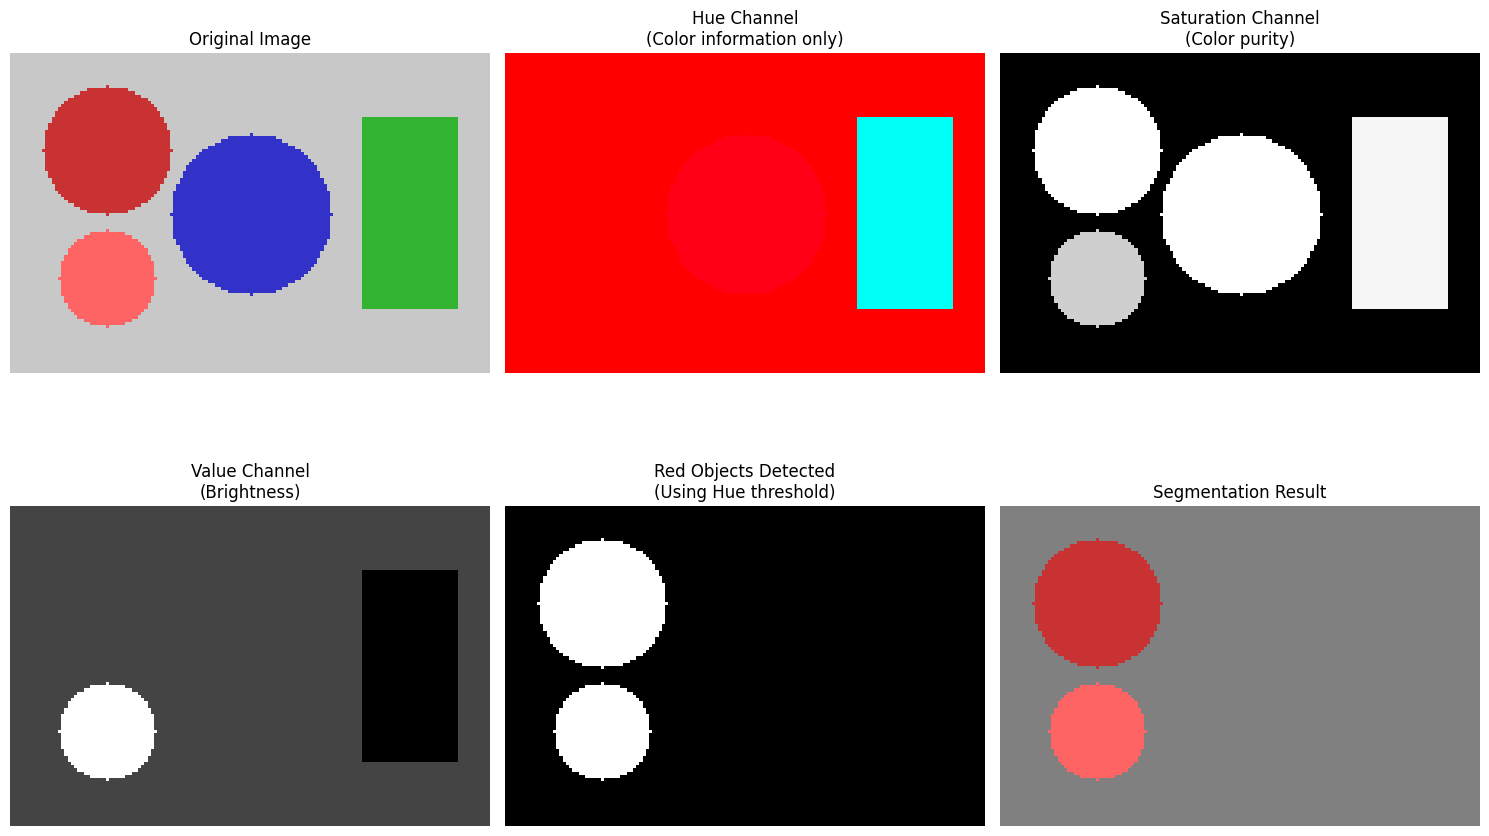

Notice: BOTH red objects are detected despite having different brightness!
This is the power of HSV - hue is independent of brightness.


In [14]:
# Create an image with colored objects
img = np.ones((100, 150, 3), dtype=np.uint8) * 200  # Gray background

# Add colored circles/rectangles
# Red object
y, x = np.ogrid[:100, :150]
red_mask = (x - 30)**2 + (y - 30)**2 <= 20**2
img[red_mask] = [200, 50, 50]  # Darker red (like blood)

# Another red object (different shade)
red_mask2 = (x - 30)**2 + (y - 70)**2 <= 15**2
img[red_mask2] = [255, 100, 100]  # Lighter red

# Blue object
blue_mask = (x - 75)**2 + (y - 50)**2 <= 25**2
img[blue_mask] = [50, 50, 200]

# Green object
img[20:80, 110:140] = [50, 180, 50]

# Convert to HSV (simplified - just for visualization)
hsv_img = np.zeros_like(img, dtype=np.float32)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        h, s, v = rgb_to_hsv(img[i,j,0], img[i,j,1], img[i,j,2])
        hsv_img[i, j] = [h, s, v]

# Segment red objects using hue (red is around 0 or 360)
h_channel = hsv_img[:, :, 0]
s_channel = hsv_img[:, :, 1]
red_segment = ((h_channel < 30) | (h_channel > 330)) & (s_channel > 30)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(img)
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(h_channel, cmap='hsv')
axes[0, 1].set_title('Hue Channel\n(Color information only)')
axes[0, 1].axis('off')

axes[0, 2].imshow(s_channel, cmap='gray')
axes[0, 2].set_title('Saturation Channel\n(Color purity)')
axes[0, 2].axis('off')

axes[1, 0].imshow(hsv_img[:, :, 2], cmap='gray')
axes[1, 0].set_title('Value Channel\n(Brightness)')
axes[1, 0].axis('off')

axes[1, 1].imshow(red_segment, cmap='gray')
axes[1, 1].set_title('Red Objects Detected\n(Using Hue threshold)')
axes[1, 1].axis('off')

# Show segmented result
result = img.copy()
result[~red_segment] = [128, 128, 128]  # Gray out non-red
axes[1, 2].imshow(result)
axes[1, 2].set_title('Segmentation Result')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

print("Notice: BOTH red objects are detected despite having different brightness!")
print("This is the power of HSV - hue is independent of brightness.")

## 6. Medical Imaging Applications

Color spaces are crucial in medical imaging for:
- Blood vessel detection (red)
- Tissue classification
- Stain normalization in histopathology

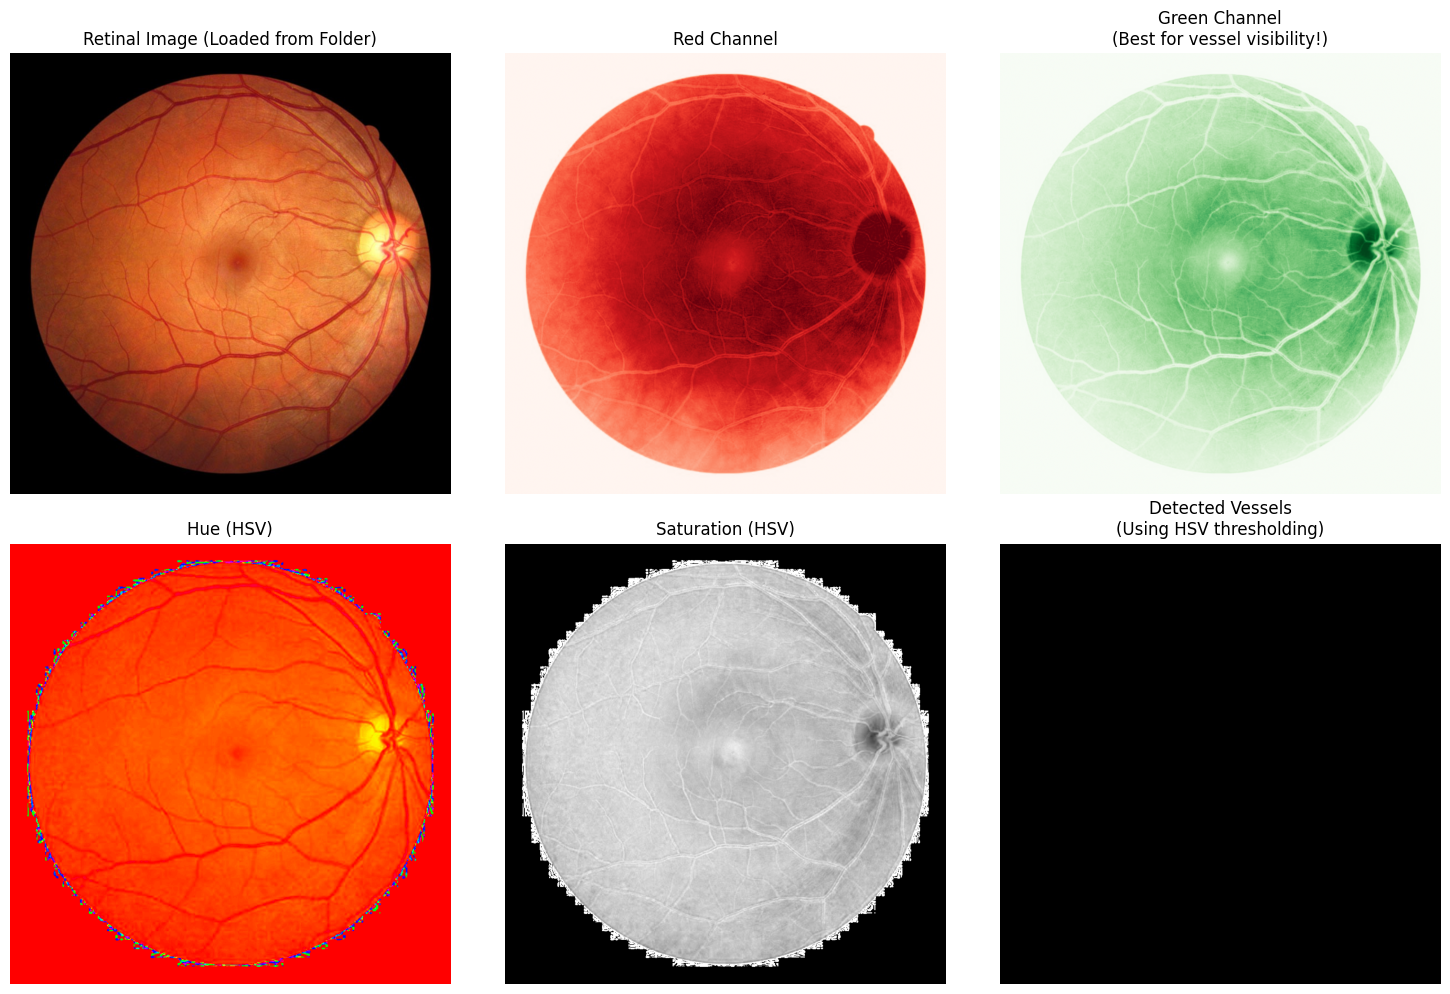

Medical Insight: In retinal imaging, the GREEN channel often shows
the best contrast for blood vessels because hemoglobin absorbs green light.


In [20]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb

# Setup
np.random.seed(42)
size = 800

# --- 1. IMAGE LOADING ---
img_path = "retina.jpg"   
img = Image.open(img_path).convert("RGB")
img = img.resize((size, size), Image.BILINEAR)
retina = np.array(img, dtype=np.uint8)
# --- END replacement ---

# Convert to HSV (rgb_to_hsv expects floats in [0,1])
retina_f = retina.astype(np.float32) / 255.0
hsv_f = rgb_to_hsv(retina_f)  # (H,W,3) in [0,1]

# Your thresholds were in ~0-255 scale; map S and V back to 0-255
S = hsv_f[:, :, 1] * 255.0
V = hsv_f[:, :, 2] * 255.0
H = hsv_f[:, :, 0] * 179.0  

lower1 = np.array([0,   150,  40], dtype=np.uint64)
upper1 = np.array([8,   255, 170], dtype=np.uint64)

lower2 = np.array([170, 150,  40], dtype=np.uint64)
upper2 = np.array([179, 255, 170], dtype=np.uint64)

mask1 = cv2.inRange(hsv_f, lower1, upper1)
mask2 = cv2.inRange(hsv_f, lower2, upper2)

vessel_mask = cv2.bitwise_or(mask1, mask2)  # uint8 mask: 0/255

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(retina)
axes[0, 0].set_title('Retinal Image (Loaded from Folder)')
axes[0, 0].axis('off')

axes[0, 1].imshow(retina[:, :, 0], cmap='Reds')
axes[0, 1].set_title('Red Channel')
axes[0, 1].axis('off')

axes[0, 2].imshow(retina[:, :, 1], cmap='Greens')
axes[0, 2].set_title('Green Channel\n(Best for vessel visibility!)')
axes[0, 2].axis('off')

axes[1, 0].imshow(hsv_f[:, :, 0], cmap='hsv')
axes[1, 0].set_title('Hue (HSV)')
axes[1, 0].axis('off')

axes[1, 1].imshow(hsv_f[:, :, 1], cmap='gray')
axes[1, 1].set_title('Saturation (HSV)')
axes[1, 1].axis('off')

axes[1, 2].imshow(vessel_mask, cmap='gray')
axes[1, 2].set_title('Detected Vessels\n(Using HSV thresholding)')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

print("Medical Insight: In retinal imaging, the GREEN channel often shows")
print("the best contrast for blood vessels because hemoglobin absorbs green light.")


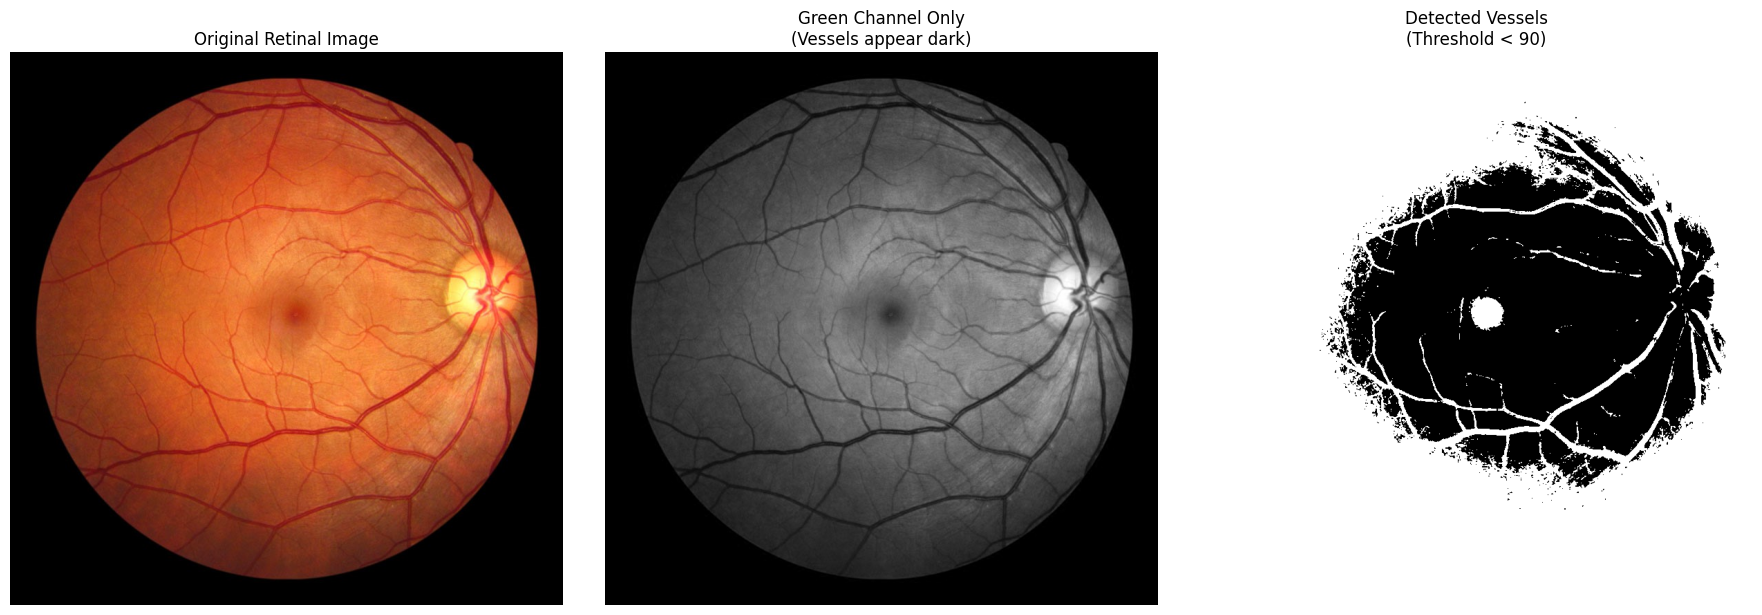

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Setup
np.random.seed(42)
size = 800

# --- 1. IMAGE LOADING ---
img_path = "retina.jpg"   
img = Image.open(img_path).convert("RGB")
img = img.resize((size, size), Image.BILINEAR)
retina = np.array(img, dtype=np.uint8)

# --- 2. PROCESSING ---

# Step A: Extract the Green Channel
# In RGB images, index 1 corresponds to Green.
# Vessels appear darkest in this channel due to light absorption properties of blood.
green_channel = retina[:, :, 1]

# Step B: Set Manual Threshold
# The pixel range is 0 (Black) to 255 (White).
# Since vessels are dark, we need to filter for values closer to 0.
THRESHOLD_VALUE = 90

# Step C: Create Binary Mask (Simple Thresholding)
# Logic: If pixel intensity is LESS than the threshold, it is considered a vessel.
# This creates a Boolean matrix (True/False).
vessel_mask = green_channel < THRESHOLD_VALUE

# --- 3. VISUALIZATION ---
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Original Image
axes[0].imshow(retina)
axes[0].set_title('Original Retinal Image')
axes[0].axis('off')

# Plot 2: Green Channel (Grayscale)
axes[1].imshow(green_channel, cmap='gray')
axes[1].set_title('Green Channel Only\n(Vessels appear dark)')
axes[1].axis('off')

# Plot 3: Resulting Mask
axes[2].imshow(vessel_mask, cmap='gray')
axes[2].set_title(f'Detected Vessels\n(Threshold < {THRESHOLD_VALUE})')
axes[2].axis('off')

plt.tight_layout()
plt.show()

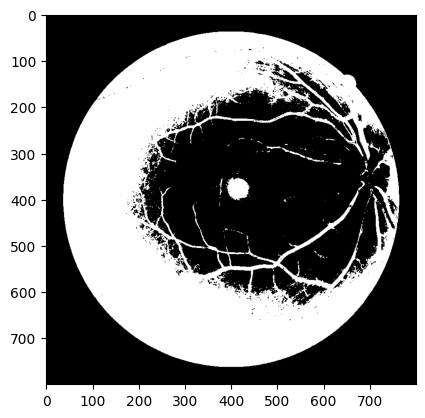

In [17]:
# ADIM 4 (YENİ): ROI Maskesi (Sadece gözün içine odaklan)
# Görüntüdeki 10'dan büyük (tam siyah olmayan) pikselleri "Göz" kabul edelim.
eye_mask = green_channel > 12

# Maskeyi uygula: Hem damar olmalı (vessel_mask) HEM DE gözün içinde olmalı (eye_mask)
clean_vessel_mask = np.logical_and(vessel_mask, eye_mask)

# GÖRSELLEŞTİRME (Sadece son paneli buna göre güncellersiniz)
plt.imshow(clean_vessel_mask, cmap='gray')

## 7. Pseudocolor / False Color

We can map grayscale values to colors to highlight features!

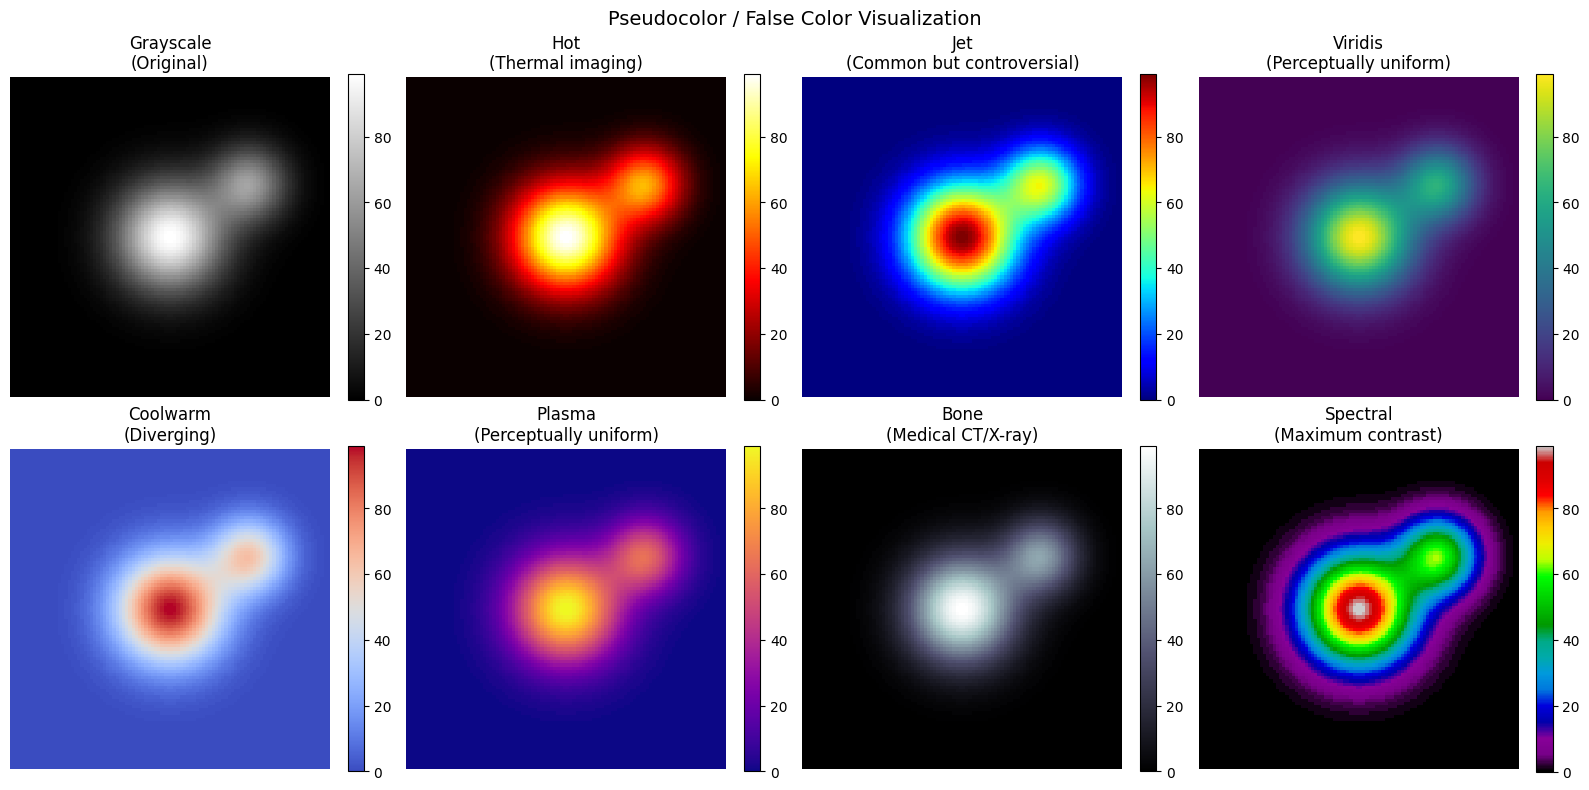

Note: The underlying data is the SAME grayscale image!
Different colormaps emphasize different features.

Best practices:
- Use 'viridis' or 'plasma' for scientific visualization
- Avoid 'jet' (causes visual artifacts)
- Use 'hot' for thermal/heat data
- Use 'bone' for medical imaging


In [18]:
# Create a simulated thermal/medical image
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# Simulate temperature distribution (like thermal imaging)
temp = np.exp(-(X**2 + Y**2)) * 100  # Hot spot in center
temp += np.exp(-((X-1.5)**2 + (Y+1)**2)/0.5) * 60  # Another hot spot
temp = temp.astype(np.uint8)

fig, axes = plt.subplots(2, 4, figsize=(16, 8))

cmaps = [
    ('gray', 'Grayscale\n(Original)'),
    ('hot', 'Hot\n(Thermal imaging)'),
    ('jet', 'Jet\n(Common but controversial)'),
    ('viridis', 'Viridis\n(Perceptually uniform)'),
    ('coolwarm', 'Coolwarm\n(Diverging)'),
    ('plasma', 'Plasma\n(Perceptually uniform)'),
    ('bone', 'Bone\n(Medical CT/X-ray)'),
    ('nipy_spectral', 'Spectral\n(Maximum contrast)'),
]

for ax, (cmap, title) in zip(axes.flat, cmaps):
    im = ax.imshow(temp, cmap=cmap)
    ax.set_title(title)
    ax.axis('off')
    plt.colorbar(im, ax=ax, fraction=0.046)

plt.suptitle('Pseudocolor / False Color Visualization', fontsize=14)
plt.tight_layout()
plt.show()

print("Note: The underlying data is the SAME grayscale image!")
print("Different colormaps emphasize different features.")
print("\nBest practices:")
print("- Use 'viridis' or 'plasma' for scientific visualization")
print("- Avoid 'jet' (causes visual artifacts)")
print("- Use 'hot' for thermal/heat data")
print("- Use 'bone' for medical imaging")

## 9. Summary

In [ ]:
print("""
SUMMARY: COLOR SPACES
====================

1. RGB (Red, Green, Blue)
   - Additive color model (mixing light)
   - Used by displays/screens
   - 3 channels, 0-255 each
   - NOT intuitive for humans

2. HSV (Hue, Saturation, Value)
   - More intuitive for humans
   - Hue = color (0-360°)
   - Saturation = purity (0-100%)
   - Value = brightness (0-100%)
   - Great for color-based segmentation

3. GRAYSCALE CONVERSION
   - Average: (R + G + B) / 3
   - Luminosity: 0.299R + 0.587G + 0.114B (matches human perception)
   - Single channel: Use just R, G, or B

4. MEDICAL IMAGING APPLICATIONS
   - Green channel often best for blood vessel contrast
   - HSV for color-based tissue segmentation
   - Pseudocolor for feature enhancement

5. BEST PRACTICES
   - Use perceptually uniform colormaps (viridis, plasma)
   - Consider color blindness (~8% of men)
   - Don't rely on color alone for critical information

Color is a tool - use it wisely!
""")